In [25]:
# read data
import pandas as pd
import matplotlib.pyplot as plt
df = pd.read_excel('/Users/kuzaowuwei/Desktop/2022美赛/赛中数据/2决策模型/data/price_volatility.xlsx')
df2 = pd.read_excel('/Users/kuzaowuwei/Desktop/2022美赛/赛中数据/2决策模型/data/price_pred.xlsx')
R_g = df['u_gold']
R_b = df['u_bitcoin']
sigma_g = df['sigma_gold']
sigma_b = df['sigma_bitcoin']
pred_g = df2['gold_pred']
pred_b = df2['bitcoin_pred']

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


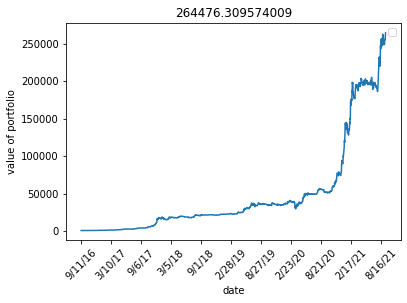

In [154]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
# df = pd.read_excel('/Users/kuzaowuwei/Desktop/2022美赛/赛中数据/2决策模型/data/price_volatility.xlsx')
# R_g = df['u_gold']
# R_b = df['u_bitcoin']
df3 = pd.read_excel('/Users/kuzaowuwei/Desktop/2022美赛/赛中数据/2决策模型/data/price_pred_volatility.xlsx')
R_g = df3['u_gold']
R_b = df3['u_bitcoin']


# print(R_g.shape)
def cal_return(g,b,a1=0.01,a2=0.02,c0=1000):
    # g,b -> (1826,)
    n = len(g)
    C = np.zeros(n)
    G = np.zeros(n)
    B = np.zeros(n)
    C[0] = 1000
    portfolio_value = np.zeros(n)
    # TR = 0
    for t in range(n-1):
        tran_loss =  abs(g[t]) * a1 + abs(b[t]) * a2
        c = -tran_loss-b[t]-g[t]
        # print(C[t])
        C[t] = C[t] + c
        G[t] = (G[t] + g[t])
        B[t] = (B[t] + b[t])
        portfolio_value[t] = C[t] + G[t] + B[t]
        
        # print(t,C[t],G[t],B[t],portfolio_value[t],sep='\t')
        C[t+1] = C[t]
        G[t+1] = G[t] * (1+R_g[t])
        B[t+1] = B[t] * (1+R_b[t])
    
    portfolio_value[n-1] = C[n-1] + G[n-1] + B[n-1]
    TR = portfolio_value[n-1] - portfolio_value[0]
    return TR,C,G,B,portfolio_value

# g = np.zeros(1826)
# b = np.zeros(1826)
# g = pso.gbest_x[:T]
# b = pso.gbest_x[T:]
# TR,C,G,B,portfolio_value = cal_return(g,b)
def simulate_resolution():
    n = len(R_g)
    a1 = 0.01
    a2 = 0.02
    c = np.zeros(n)
    g = np.zeros(n)
    b = np.zeros(n)
    C = np.zeros(n)
    G = np.zeros(n)
    B = np.zeros(n)
    C[0] = 1000
    portfolio_value = np.zeros(n)
    rr1 = 0.25
    rr2 = 0.5
    for t in range(n-1):
        # r1 = rr1 + (np.random.rand()-0.5) * 0.4
        # r2 = rr2 + (np.random.rand()-0.5) * 0.8
        r1 = rr1 + (np.random.rand()-0.5) * 0
        r2 = rr2 + (np.random.rand()-0.5) * 0
        # if abs(R_g[t+1]) > a1 :
        #     if R_g[t+1] < 0:
        #         g[t] = -G[t]*r2
        #     else:
        #         g[t] = C[t]*r1

        # if abs(R_b[t+1])>a2:
        #     if R_b[t+1]<0:
        #         b[t] = -B[t]*r2
        #     else:
        #         b[t] = C[t]*r1 


        # disturbance rate
        # dr= 1+(np.random.rand() - 0.8) * 0.4
        # dr_g = 1+(np.random.rand() - 0.2) * 0.4
        dr= 1+(np.random.rand() - 0.8) * 0
        dr_g = 1+(np.random.rand() - 0.2) * 0
        ag = abs(R_g[t+1]) - a1 * dr_g
        ab = abs(R_b[t+1]) - a2 * dr
        if abs(R_g[t+1]) > a1 * dr_g and abs(R_b[t+1])>a2 * dr:
            if R_g[t+1] > 0 and R_b[t+1] > 0:
                g[t] = C[t]*r1*1.8*(ag/(ag+ab))
                b[t] = C[t]*r1*1.8*(ab/(ag+ab))
            elif R_g[t+1] > 0 and R_b[t+1] <= 0:
                g[t] = C[t]*r1*1.8
                b[t] = -B[t]*r2
            elif R_g[t+1] <= 0 and R_b[t+1] > 0:
                g[t] = -G[t]*r2
                b[t] = C[t]*r1*1.8
            else:
                g[t] = -G[t]*r2
                b[t] = -B[t]*r2

        elif abs(R_g[t+1]) > a1 * dr_g and abs(R_b[t+1]) <= a2 * dr:
            if R_g[t+1] < 0:
                g[t] = -G[t]*r2
            else:
                g[t] = C[t]*r1*1.5

        elif abs(R_g[t+1]) <= a1 * dr_g and abs(R_b[t+1]) > a2 * dr:
            if R_b[t+1]<0:
                b[t] = -B[t]*r2
            else:
                b[t] = C[t]*r1*1.5

            
        tran_loss = abs(g[t]) * a1 + abs(b[t]) * a2
        c = -tran_loss-b[t]-g[t]
        # print(C[t])
        C[t] = C[t] + c
        G[t] = (G[t] + g[t])
        B[t] = (B[t] + b[t])

        C[t+1] = C[t]
        G[t+1] = G[t] * (1+R_g[t])
        B[t+1] = B[t] * (1+R_b[t])
    return g,b
v = -1
while v < 250000 or v > 270000:
    g,b = simulate_resolution()
    TR,C,G,B,portfolio_value = cal_return(g,b)

    df_res = pd.DataFrame()
    df_res['date'] = df3['date']
    df_res['delta_g'] = g
    df_res['delta_b'] = b
    df_res['C'] = C
    df_res['G'] = G
    df_res['B'] = B
    df_res['value'] = portfolio_value

    v = portfolio_value[-1]
plt.plot(portfolio_value)

# legend xticks
plt.xticks([i for i in range(len(df_res['date'].values))], df_res['date'].values,rotation=45)
# plt.xticks(trainDateList)
plt.ylabel('value of portfolio')
plt.xlabel('date')
plt.legend()
x_major_locator=plt.MultipleLocator(180)
ax=plt.gca()
ax.xaxis.set_major_locator(x_major_locator)

plt.title('{}'.format(portfolio_value[-1]))
plt.show()

In [153]:
df_res.to_excel('/Users/kuzaowuwei/Desktop/2022美赛/赛中数据/2决策模型/data/final_data_再尝试/规划模型26w.xlsx')

<AxesSubplot:>

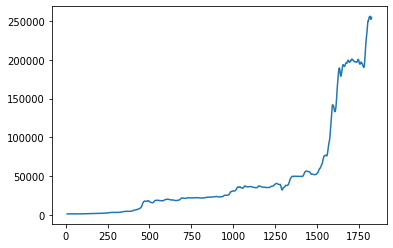

In [158]:
df_res['value'].rolling(10).mean().plot()